# Homework 2: Regression and Ensemble Methods [25 pts]
## Comp562 Summer II 2023

### Due 11:59pm July 10, 2023

In this assignment, you will use the regression and ensemble algorithms discussed in class and experiment with some toy data. To avoid unexpected behavior with cached variables, test your code with a fresh kernel.

### Problem 1: Regression [9 pts]

Use the dataset provided in `hw2_train_regression.csv` for this problem. Data has shape \[N,2\] where the last column is the sample label.

**(1a)** Use the linear regression formulation derived in class to compute a best-fitting line to the data. Compute and print the mean squared error on the training data. [3 pts] (Hint: use [np.matmul()](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) and [np.linalg.inv()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) for matrix operations.)

In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

fn = 'hw2_train_regression.csv'
train_data = np.genfromtxt(fn, delimiter=',')
X = train_data[:,:-1]
y = train_data[:,-1].reshape((-1,1))

# TODO: find linear regression
X = np.insert(X, 0, 1, axis=1)
X_t = X.T
X_t_X_inv = np.linalg.inv(X_t @ X)
weights = X_t_X_inv @ X_t @ y

# compute MSE
y_pred = X @ weights
mse = np.mean((y - y_pred) ** 2)
print(f'mean squared error: {mse}')

mean squared error: 0.22022621525288605


**(1b)** We will now rescale the data to model a probability distribution. Use logistic regression to compute a best-fitting sigmoid to the rescaled data. Compute and print the mean squared error on the training data. [3 pts]

In [96]:
from scipy.optimize import minimize_scalar
import numpy as np

y_prob = y - np.amin(y)
y_prob = y_prob / np.amax(y_prob)

# TODO: write energy function
def energy(w):
    return np.mean((sigmoidfunc(np.dot(X, w)) - y_prob) ** 2)

def sigmoidfunc(x):
    return 1 / (1 + np.exp(-x))

result = minimize_scalar(energy)
log_w = result.x
print(f'log_w: {log_w}')

# compute MSE
y_pred = sigmoidfunc(np.dot(X, log_w))
log_error = np.mean((y_prob - y_pred) ** 2)
print(f'logistic error: {log_error:>0.4}')

log_w: 0.22373022910346999
logistic error: 0.04704


**(1c)** Plot the results of both regressions. Explain any differences you observe in the plots and training error you computed. [3 pts]

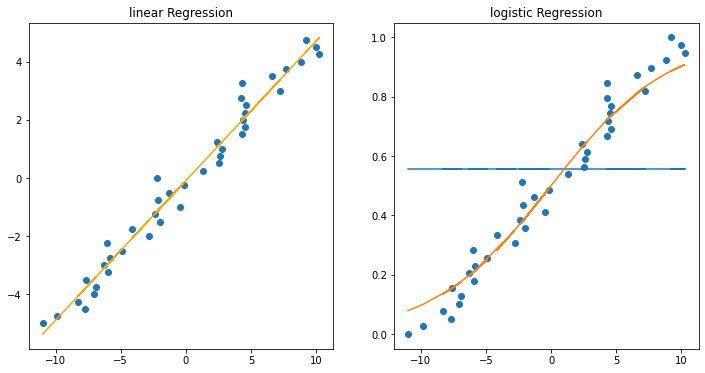

In [104]:
plt.figure(figsize=(12,6))
# TODO: plot function at each X[:,0]

#I plotted them at X[:,1] instead of X[:,0]
#Not sure if you meant that literally or not 

#Linear Regression
plt.subplot(121)
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, weights), color='orange')
plt.title('linear Regression')

#Logistic Regression
plt.subplot(122)
plt.scatter(X[:, 1], y_prob)
plt.plot(X[:, 1], sigmoid(np.dot(X, log_w)))
plt.title('logistic Regression')

plt.show()

Plots:
- From the plots it is hard to tell what regression fit the data better 
- Both plots miss points in the data 
- The logistic regression doesn;t seem as great of fit from the graph

Graph: 
- The logistic error I calculated is smaller than the MSE 
- I feel the linear error I calculated seems a bit high in comparison to the logisitc error


### Problem 2: Ensembles [16 pts]

Use the dataset provided by scipy for this problem. Feel free to use the sklearn implementation to train weak learners and numpy for any vector/matrix operations. To control randomness, you can set random_state where applicable to see the random number generator.

**(2a)** Combine your favorite weak learner with bagging to classify the data. [4 pts]

In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

data, target = load_breast_cancer(return_X_y=True)
training_data, test_data, training_labels, test_labels = train_test_split(data, target,
                                                                          test_size=0.1, random_state=1)

#TODO: implement bagging with your choice of weak learner
#Naives Bayes 
w_l = GaussianNB()
bagging =  BaggingClassifier(base_estimator=weak_learn, n_estimators=20)
bagging.fit(training_data, training_labels)


BaggingClassifier(base_estimator=GaussianNB(), n_estimators=20)

**(2b)** Combine the same weak learner from (2a) with AdaBoost to fit the data. [6 pts]

In [127]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# TODO: implement AdaBoost with weak learner
adaboost = AdaBoostClassifier(base_estimator=w_l, n_estimators=20)
adaboost.fit(training_data, training_labels)


AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=20)

**(2c)** Evaluate the combined models from (2a) and (2b) on the test partition and compute average accuracy. [2 pts]

In [128]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn.utils.extmath import weighted_mode

# TODO: compute average accuracies
#bagging accuracy
bagging_accuracy = bagging.score(test_data, test_labels)

#ada accuracy
ada_accuracy = adaboost.score(test_data, test_labels)

#average accuracy
average_accuracy = np.mean([bagging_accuracy, ada_accuracy])
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.7456140350877193


**(2d)** Find the per-model accuracy for both your bagging and boosting ensembles. [2 pts]

In [129]:
# TODO: compute per-model accuracies for weak learners
#print bagging accuracy
print("Bagging Accuracy:", bagging_accuracy)

#print adaboost accuracy
print("AdaBoost Accuracy:", ada_accuracy)

Bagging Accuracy: 0.9473684210526315
AdaBoost Accuracy: 0.543859649122807


**(2e)** What, if any, differences do you observe in performance between using bagging and AdaBoost? Between your weak classifiers and ensembles? Is this result surprising? [2 pts]

- The accuracy for bagging is higher than AdaBoost
- You can see the Adaboost accuracy is significantly lower, this result was very surprising to me
